# Prerequisites

In [2]:
# !pip install transformers

import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# # Mount to drive so we can access our own files
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import glob
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import librosa, sklearn
import librosa.display as display
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

# Load model and data

In [4]:
# import sys"

# sys.path.append("/content/drive/MyDrive")
# import custom_wav2vec2"
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

# from custom_wav2vec2 import Wav2Vec2ForCTC

/Users/angelavansprang/miniconda3/envs/audioenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# load model and tokenizer
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# put model in evaluation mode
model.eval()
model.to(DEVICE)

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You sho

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

In [9]:
model.wav2vec2.encoder.layers[0].attention.feed_forward

AttributeError: 'Wav2Vec2Attention' object has no attribute 'feed_forward'

In [6]:
_  # clean, tan, own, lean, thin
target_stimuli = ["A1", "A3", "A4", "A5", "A8"]
target_files = []
for target in target_stimuli:
    for file in glob.glob(f"drive/MyDrive/assimilation/stimA/{target}Pn*"):
        if not file.endswith("(1).wav"):
            target_files.append(file)

print(len(target_files))

45


In [7]:
index_dict = {
    "lean_back_1": {
        "v_file_idx": 27,
        "v_frame_idx": 36,
        "v_target_word": [30, 38],
        "v_context_word": [43, 56],
        "u_file_idx": 28,
        "u_frame_idx": 37,
        "u_target_word": [30, 38],
        "u_context_word": [45, 58],
    },
    "lean_back_2": {
        "v_file_idx": 30,
        "v_frame_idx": 52,
        "v_target_word": [45, 53],
        "v_context_word": [58, 72],
        "u_file_idx": 31,
        "u_frame_idx": 56,
        "u_target_word": [49, 57],
        "u_context_word": [64, 78],
    },
    "lean_back_3": {
        "v_file_idx": 33,
        "v_frame_idx": 115,
        "v_target_word": [109, 117],
        "v_context_word": [122, 136],
        "u_file_idx": 34,
        "u_frame_idx": 117,
        "u_target_word": [109, 117],
        "u_context_word": [124, 138],
    },
    "thin_packet": {
        "v_file_idx": 36,
        "v_frame_idx": 38,
        "v_target_word": [32, 39],
        "v_context_word": [45, 63],
        "u_file_idx": 37,
        "u_frame_idx": 41,
        "u_target_word": [35, 42],
        "u_context_word": [47, 65],
    },
    "great_cruise_1": {
        "v_file_idx": 0,
        "v_frame_idx": 61,
        "v_target_word": [53, 63],
        "v_context_word": [69, 87],
        "u_file_idx": 1,
        "u_frame_idx": 62,
        "u_target_word": [53, 63],
        "u_context_word": [69, 87],
    },
    "great_cruise_2": {
        "v_file_idx": 6,
        "v_frame_idx": 107,
        "v_target_word": [98, 108],
        "v_context_word": [115, 133],
        "u_file_idx": 7,
        "u_frame_idx": 112,
        "u_target_word": [103, 113],
        "u_context_word": [120, 138],
    },
    "sweet_cocktail_1": {
        "v_file_idx": 10,
        "v_frame_idx": 74,
        "v_target_word": [65, 75],
        "v_context_word": [82, 104],
        "u_file_idx": 9,
        "u_frame_idx": 71,
        "u_target_word": [62, 72],
        "u_context_word": [78, 100],
    },
    "sweet_cocktail_2": {
        "v_file_idx": 13,
        "v_frame_idx": 22,
        "v_target_word": [13, 23],
        "v_context_word": [29, 49],
        "u_file_idx": 12,
        "u_frame_idx": 25,
        "u_target_word": [16, 26],
        "u_context_word": [32, 52],
    },
    "fat_puppy": {
        "v_file_idx": 21,
        "v_frame_idx": 94,
        "v_target_word": [87, 95],
        "v_context_word": [101, 115],
        "u_file_idx": 22,
        "u_frame_idx": 102,
        "u_target_word": [95, 103],
        "u_context_word": [108, 122],
    },
    "wet_pants": {
        "v_file_idx": 27,
        "v_frame_idx": 53,
        "v_target_word": [47, 54],
        "v_context_word": [59, 78],
        "u_file_idx": 28,
        "u_frame_idx": 50,
        "u_target_word": [44, 51],
        "u_context_word": [56, 75],
    },
    "bad_beer": {
        "v_file_idx": 18,
        "v_frame_idx": 139,
        "v_target_word": [131, 140],
        "v_context_word": [146, 158],
        "u_file_idx": 19,
        "u_frame_idx": 137,
        "u_target_word": [129, 138],
        "u_context_word": [143, 155],
    },
    "mad_brother_1": {
        "v_file_idx": 4,
        "v_frame_idx": 122,
        "v_target_word": [114, 124],
        "v_context_word": [128, 144],
        "u_file_idx": 3,
        "u_frame_idx": 123,
        "u_target_word": [114, 124],
        "u_context_word": [129, 145],
    },
    "mad_brother_2": {
        "v_file_idx": 6,
        "v_frame_idx": 84,
        "v_target_word": [77, 85],
        "v_context_word": [89, 104],
        "u_file_idx": 8,
        "u_frame_idx": 86,
        "u_target_word": [79, 87],
        "u_context_word": [91, 106],
    },
    "red_glasses_1": {
        "v_file_idx": 0,
        "v_frame_idx": 18,
        "v_target_word": [12, 19],
        "v_context_word": [24, 46],
        "u_file_idx": 1,
        "u_frame_idx": 18,
        "u_target_word": [12, 19],
        "u_context_word": [24, 46],
    },
    "red_glasses_2": {
        "v_file_idx": 8,
        "v_frame_idx": 101,
        "v_target_word": [95, 102],
        "v_context_word": [106, 131],
        "u_file_idx": 3,
        "u_frame_idx": 103,
        "u_target_word": [97, 104],
        "u_context_word": [109, 134],
    },
}

# Run the model on a viable and unviable input + save all activations

In [8]:
def get_activations_for_dataset(model, stimuli: list):
    # Create a list of dictionaries to store the activations of each sample.
    activations = []

    def reset_activations():
        # Reset the activations for a new sample.
        activations.append(
            {
                "value_vectors": defaultdict(list),
                "individual_heads": defaultdict(list),
                "attention_weights": defaultdict(list),
                "attention.k_proj": defaultdict(list),
                "attention.v_proj": defaultdict(list),
                "attention.q_proj": defaultdict(list),
                "attention.out_proj": defaultdict(list),
                "feed_forward.output_dense": defaultdict(list),
                "layer_output": defaultdict(list),
            }
        )

    def value_vectors_hook(layer_id):
        def hook(module, input, output):
            activations[-1]["value_vectors"][layer_id].append(output.detach())

        return hook

    def attention_hook(layer_id):
        def hook(module, input, output):
            activations[-1]["individual_heads"][layer_id].append(output.detach())

        return hook

    def attention_weights_hook(layer_id):
        def hook(module, input, output):
            activations[-1]["attention_weights"][layer_id].append(output.detach())

        return hook

    def attention_k_proj_hook(layer_id):
        def hook(module, input, output):
            activations[-1]["attention.k_proj"][layer_id].append(output.detach())

        return hook

    def attention_v_proj_hook(layer_id):
        def hook(module, input, output):
            activations[-1]["attention.v_proj"][layer_id].append(output.detach())

        return hook

    def attention_q_proj_hook(layer_id):
        def hook(module, input, output):
            activations[-1]["attention.q_proj"][layer_id].append(output.detach())

        return hook

    def attention_out_proj_hook(layer_id):
        def hook(module, input, output):
            activations[-1]["attention.out_proj"][layer_id].append(output.detach())

        return hook

    def output_dense_hook(layer_id):
        def hook(module, input, output):
            activations[-1]["feed_forward.output_dense"][layer_id].append(
                output.detach()
            )

        return hook

    def layer_output_hook(layer_id):
        def hook(module, input, output):
            activations[-1]["layer_output"][layer_id].append(output.detach())

        return hook

    # Register the hooks.
    for i, layer in enumerate(model.wav2vec2.encoder.layers):
        layer.attention.value_vectors.register_forward_hook(value_vectors_hook(i))
        layer.attention.individual_heads.register_forward_hook(attention_hook(i))
        layer.attention.attn_weights.register_forward_hook(attention_weights_hook(i))
        layer.attention.k_proj.register_forward_hook(attention_k_proj_hook(i))
        layer.attention.v_proj.register_forward_hook(attention_v_proj_hook(i))
        layer.attention.q_proj.register_forward_hook(attention_q_proj_hook(i))
        layer.attention.out_proj.register_forward_hook(attention_out_proj_hook(i))
        layer.feed_forward.output_dense.register_forward_hook(output_dense_hook(i))
        layer.final_layer_norm.register_forward_hook(layer_output_hook(i))

    # Go through your dataset and compute the forward passes.
    res = []
    for s in stimuli:
        reset_activations()
        torch.manual_seed(42)
        raw_waveform, sr = librosa.load(s, sr=16000)
        input = processor(
            raw_waveform,
            sampling_rate=16000,
            return_tensors="pt",
            padding="max_length",
            max_length=1000,
        ).input_values.to(DEVICE)
        output_dict = model(input, output_attentions=True, output_hidden_states=True)
        hidden_states_before_intervention = output_dict.hidden_states
        logits = output_dict.logits[0]
        res.append(logits)

    # Unregister the hooks to make sure they don't interfere with the next dataset.
    for i, layer in enumerate(model.wav2vec2.encoder.layers):
        layer.attention.value_vectors._forward_hooks.clear()
        layer.attention.individual_heads._forward_hooks.clear()
        layer.attention.attn_weights._forward_hooks.clear()
        layer.attention.k_proj._forward_hooks.clear()
        layer.attention.v_proj._forward_hooks.clear()
        layer.attention.q_proj._forward_hooks.clear()
        layer.attention.out_proj._forward_hooks.clear()
        layer.feed_forward.output_dense._forward_hooks.clear()
        layer.final_layer_norm._forward_hooks.clear()

    return res, activations, hidden_states_before_intervention

In [9]:
stimulus = "thin_packet"

v_file_idx = index_dict[stimulus]["v_file_idx"]
u_file_idx = index_dict[stimulus]["u_file_idx"]

v_frame_idx = index_dict[stimulus]["v_frame_idx"]
u_frame_idx = index_dict[stimulus]["u_frame_idx"]

viable_stimuli = [target_files[v_file_idx]]
unviable_stimuli = [target_files[u_file_idx]]

(
    viable_res,
    viable_activations,
    viable_hidden_states_before_intervention,
) = get_activations_for_dataset(model, viable_stimuli)
(
    unviable_res,
    unviable_activations,
    unviable_hidden_states_before_intervention,
) = get_activations_for_dataset(model, unviable_stimuli)

# Perform interventions

In [10]:
# Get viable input
raw_waveform, sr = librosa.load(target_files[v_file_idx], sr=16000)
input_values = processor(
    raw_waveform,
    sampling_rate=16000,
    return_tensors="pt",
    padding="max_length",
    max_length=1000,
).input_values
viable_input = input_values.to(DEVICE)

# Get unviable input
raw_waveform, sr = librosa.load(target_files[u_file_idx], sr=16000)
input_values = processor(
    raw_waveform,
    sampling_rate=16000,
    return_tensors="pt",
    padding="max_length",
    max_length=1000,
).input_values
unviable_input = input_values.to(DEVICE)

In [11]:
###VIABLE###
# Get transcription before intervention
output_dict = model(viable_input, output_hidden_states=True)
logits_before_intervention = output_dict.logits

# Convert logits into probs
probs_before_intervention = torch.softmax(logits_before_intervention, dim=-1)

# Get transcription
predicted_ids = torch.argmax(logits_before_intervention, dim=-1)
transcription = processor.batch_decode(predicted_ids)
print("Transcription:", transcription)
print("Number of frames:", len(predicted_ids[0]))
print("Target frame:", u_frame_idx)

# Convert ids to tokens (the model generates frame embeddings and then predicts a token for each embedding)
viable_predicted_tokens_list = processor.tokenizer.convert_ids_to_tokens(
    predicted_ids[0].tolist()
)

Transcription: ['I LOST THE THIN PACKET YOU GAVE ME DO YOU HAVE ANOTHER COPY']
Number of frames: 169
Target frame: 41


In [12]:
###UNVIABLE###
# Get transcription before intervention
output_dict = model(unviable_input, output_hidden_states=True)
logits_before_intervention = output_dict.logits
hidden_states_before_intervention = output_dict.hidden_states

# Get transcription
predicted_ids = torch.argmax(logits_before_intervention, dim=-1)
transcription = processor.batch_decode(predicted_ids)
print("Transcription:", transcription)
print("Number of frames:", len(predicted_ids[0]))
print("Target frame:", u_frame_idx)

# # Convert logits into probs
probs_before_intervention = torch.softmax(logits_before_intervention, dim=-1)

# Convert ids to tokens (the model generates frame embeddings and then predicts a token for each embedding)
predicted_tokens_list = processor.tokenizer.convert_ids_to_tokens(
    predicted_ids[0].tolist()
)

Transcription: ['I LOST THE THIM LEAFLET YOU GAVE ME DO YOU HAVE ANOTHER COPY']
Number of frames: 176
Target frame: 41


In [13]:
lexical_id = torch.argmax(viable_res[0][v_frame_idx]).item()
acoustic_id = torch.argmax(unviable_res[0][u_frame_idx]).item()

print(
    f"ID of letter {processor.tokenizer.convert_ids_to_tokens(lexical_id)}:", lexical_id
)
print(
    f"ID of letter {processor.tokenizer.convert_ids_to_tokens(acoustic_id)}:",
    acoustic_id,
)

print(
    "Prob. for lexical consonant:",
    probs_before_intervention[0][u_frame_idx][lexical_id].item(),
)
print(
    "Prob. for acoustic consonant:",
    probs_before_intervention[0][u_frame_idx][acoustic_id].item(),
)

ID of letter N: 9
ID of letter M: 17
Prob. for lexical consonant: 0.164784774184227
Prob. for acoustic consonant: 0.8348342180252075


## Intervening on head and MLP outputs:

In [14]:
# Here we will save the probability differences after each intervention
heatmaps = []

In [15]:
# Get the indeces of the assimilated word in the viable and unviable sentence
v_idx_0 = index_dict[stimulus]["v_target_word"][0]
v_idx_1 = index_dict[stimulus]["v_target_word"][1]
u_idx_0 = index_dict[stimulus]["u_target_word"][0]
u_idx_1 = index_dict[stimulus]["u_target_word"][1]

print(predicted_tokens_list[u_idx_0:u_idx_1])
print(viable_predicted_tokens_list[v_idx_0:v_idx_1])
print(predicted_tokens_list[u_frame_idx])
print(viable_predicted_tokens_list[v_frame_idx])

print(v_idx_0, v_idx_1, u_idx_0, u_idx_1)

['T', 'H', '<pad>', '<pad>', 'I', '<pad>', 'M']
['T', 'H', '<pad>', '<pad>', 'I', '<pad>', 'N']
M
N
32 39 35 42


###Position: Assimilated word, **critical frame**

In [16]:
def head_hook(module, input, output):
    output[:, u_frame_idx, module_type, :] = intervention_output[
        :, v_frame_idx, module_type, :
    ]
    return output


def mlp_hook(module, input, output):
    output[:, u_frame_idx, :] = intervention_output_mlp[:, v_frame_idx, :]
    return output


intervention_prob_diff = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
    "mlp": [],
}

for layer_index in range(12):
    for module_type in intervention_prob_diff.keys():
        # First, we register my_hook on the target module at layer i and save its handle
        if module_type != "mlp":
            head_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].attention.individual_heads.register_forward_hook(head_hook)
        else:
            mlp_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].feed_forward.output_dense.register_forward_hook(mlp_hook)

        # Next, we define the intervention output, which we'll insert at the target position after the forward pass
        intervention_output = viable_activations[0]["individual_heads"][layer_index][0]
        intervention_output_mlp = viable_activations[0]["feed_forward.output_dense"][
            layer_index
        ][0]

        # Now, we run the forward pass on the unviable input (after the intervention)
        logits_after_intervention = model(unviable_input, output_attentions=True).logits

        # Convert logits to probabilities
        probs_after_intervention = torch.softmax(logits_after_intervention, dim=-1)

        # Remove the hook
        if module_type != "mlp":
            head_hook_handle.remove()

        else:
            mlp_hook_handle.remove()

        # Examine if the intervention changed the transcription
        predicted_ids = torch.argmax(logits_after_intervention, dim=-1)
        transcription = processor.batch_decode(predicted_ids)

        # Calculate logit difference between lexical and acoustic consonant before and after the intervention
        prob_diff_before = (
            probs_before_intervention[0][u_frame_idx][lexical_id].item()
            - probs_before_intervention[0][u_frame_idx][acoustic_id].item()
        )
        prob_diff_after = (
            probs_after_intervention[0][u_frame_idx][lexical_id].item()
            - probs_after_intervention[0][u_frame_idx][acoustic_id].item()
        )

        intervention_prob_diff[module_type].append(prob_diff_after)

heatmaps.append(intervention_prob_diff)

###Position: Assimilated word, **critical phone**

In [17]:
def head_hook(module, input, output):
    output[:, u_frame_idx - 3 : u_frame_idx + 3, module_type, :] = intervention_output[
        :, v_frame_idx - 3 : v_frame_idx + 3, module_type, :
    ]
    return output


def mlp_hook(module, input, output):
    output[:, u_frame_idx - 3 : u_frame_idx + 3, :] = intervention_output_mlp[
        :, v_frame_idx - 3 : v_frame_idx + 3, :
    ]
    return output


intervention_prob_diff = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
    "mlp": [],
}

for layer_index in range(12):
    for module_type in intervention_prob_diff.keys():
        # First, we register my_hook on the target module at layer i and save its handle
        if module_type != "mlp":
            head_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].attention.individual_heads.register_forward_hook(head_hook)
        else:
            mlp_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].feed_forward.output_dense.register_forward_hook(mlp_hook)

        # Next, we define the intervention output, which we'll insert at the target position after the forward pass
        intervention_output = viable_activations[0]["individual_heads"][layer_index][0]
        intervention_output_mlp = viable_activations[0]["feed_forward.output_dense"][
            layer_index
        ][0]

        # Now, we run the forward pass on the unviable input (after the intervention)
        logits_after_intervention = model(unviable_input, output_attentions=True).logits

        # Convert logits to probabilities
        probs_after_intervention = torch.softmax(logits_after_intervention, dim=-1)

        # Remove the hook
        if module_type != "mlp":
            head_hook_handle.remove()

        else:
            mlp_hook_handle.remove()

        # Examine if the intervention changed the transcription
        predicted_ids = torch.argmax(logits_after_intervention, dim=-1)
        transcription = processor.batch_decode(predicted_ids)

        # Calculate logit difference between lexical and acoustic consonant before and after the intervention
        prob_diff_before = (
            probs_before_intervention[0][u_frame_idx][lexical_id].item()
            - probs_before_intervention[0][u_frame_idx][acoustic_id].item()
        )
        prob_diff_after = (
            probs_after_intervention[0][u_frame_idx][lexical_id].item()
            - probs_after_intervention[0][u_frame_idx][acoustic_id].item()
        )

        intervention_prob_diff[module_type].append(prob_diff_after)

heatmaps.append(intervention_prob_diff)

###Position: Assimilated word, **whole word**

In [18]:
def head_hook(module, input, output):
    output[:, u_idx_0 - 3 : u_idx_1 + 3, module_type, :] = intervention_output[
        :, v_idx_0 - 3 : v_idx_1 + 3, module_type, :
    ]
    return output


def mlp_hook(module, input, output):
    output[:, u_idx_0 - 3 : u_idx_1 + 3, :] = intervention_output_mlp[
        :, v_idx_0 - 3 : v_idx_1 + 3, :
    ]
    return output


intervention_prob_diff = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
    "mlp": [],
}

for layer_index in range(12):
    for module_type in intervention_prob_diff.keys():
        # First, we register my_hook on the target module at layer i and save its handle
        if module_type != "mlp":
            head_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].attention.individual_heads.register_forward_hook(head_hook)
        else:
            mlp_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].feed_forward.output_dense.register_forward_hook(mlp_hook)

        # Next, we define the intervention output, which we'll insert at the target position after the forward pass
        intervention_output = viable_activations[0]["individual_heads"][layer_index][0]
        intervention_output_mlp = viable_activations[0]["feed_forward.output_dense"][
            layer_index
        ][0]

        # Now, we run the forward pass on the unviable input (after the intervention)
        logits_after_intervention = model(unviable_input, output_attentions=True).logits

        # Convert logits to probabilities
        probs_after_intervention = torch.softmax(logits_after_intervention, dim=-1)

        # Remove the hook
        if module_type != "mlp":
            head_hook_handle.remove()

        else:
            mlp_hook_handle.remove()

        # Examine if the intervention changed the transcription
        predicted_ids = torch.argmax(logits_after_intervention, dim=-1)
        transcription = processor.batch_decode(predicted_ids)

        # Calculate logit difference between lexical and acoustic consonant before and after the intervention
        prob_diff_before = (
            probs_before_intervention[0][u_frame_idx][lexical_id].item()
            - probs_before_intervention[0][u_frame_idx][acoustic_id].item()
        )
        prob_diff_after = (
            probs_after_intervention[0][u_frame_idx][lexical_id].item()
            - probs_after_intervention[0][u_frame_idx][acoustic_id].item()
        )

        intervention_prob_diff[module_type].append(prob_diff_after)

heatmaps.append(intervention_prob_diff)

###Position: Context word, **critical frame**

In [19]:
v_idx_0 = index_dict[stimulus]["v_context_word"][0]
v_idx_1 = index_dict[stimulus]["v_context_word"][1]
u_idx_0 = index_dict[stimulus]["u_context_word"][0]
u_idx_1 = index_dict[stimulus]["u_context_word"][1]
print(predicted_tokens_list[u_idx_0:u_idx_1])
print(viable_predicted_tokens_list[v_idx_0:v_idx_1])

['L', 'L', 'E', 'E', '<pad>', 'A', '<pad>', '<pad>', 'F', '<pad>', '<pad>', 'L', 'L', '<pad>', '<pad>', 'E', '<pad>', 'T']
['P', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', 'A', 'C', '<pad>', '<pad>', '<pad>', 'K', '<pad>', '<pad>', 'E', '<pad>', 'T', 'T']


In [20]:
def head_hook(module, input, output):
    output[:, u_idx_0, module_type, :] = intervention_output[:, v_idx_0, module_type, :]
    return output


def mlp_hook(module, input, output):
    output[:, u_idx_0, :] = intervention_output_mlp[:, v_idx_0, :]
    return output


intervention_prob_diff = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
    "mlp": [],
}

for layer_index in range(12):
    for module_type in intervention_prob_diff.keys():
        # First, we register my_hook on the target module at layer i and save its handle
        if module_type != "mlp":
            head_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].attention.individual_heads.register_forward_hook(head_hook)
        else:
            mlp_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].feed_forward.output_dense.register_forward_hook(mlp_hook)

        # Next, we define the intervention output, which we'll insert at the target position after the forward pass
        intervention_output = viable_activations[0]["individual_heads"][layer_index][0]
        intervention_output_mlp = viable_activations[0]["feed_forward.output_dense"][
            layer_index
        ][0]

        # Now, we run the forward pass on the unviable input (after the intervention)
        logits_after_intervention = model(unviable_input, output_attentions=True).logits

        # Convert logits to probabilities
        probs_after_intervention = torch.softmax(logits_after_intervention, dim=-1)

        # Remove the hook
        if module_type != "mlp":
            head_hook_handle.remove()

        else:
            mlp_hook_handle.remove()

        # Examine if the intervention changed the transcription
        predicted_ids = torch.argmax(logits_after_intervention, dim=-1)
        transcription = processor.batch_decode(predicted_ids)

        # Calculate logit difference between lexical and acoustic consonant before and after the intervention
        prob_diff_before = (
            probs_before_intervention[0][u_frame_idx][lexical_id].item()
            - probs_before_intervention[0][u_frame_idx][acoustic_id].item()
        )
        prob_diff_after = (
            probs_after_intervention[0][u_frame_idx][lexical_id].item()
            - probs_after_intervention[0][u_frame_idx][acoustic_id].item()
        )

        intervention_prob_diff[module_type].append(prob_diff_after)

heatmaps.append(intervention_prob_diff)

###Position: Context word, **critical phone**

In [21]:
def head_hook(module, input, output):
    output[:, u_idx_0 - 3 : u_idx_0 + 3, module_type, :] = intervention_output[
        :, v_idx_0 - 3 : v_idx_0 + 3, module_type, :
    ]
    return output


def mlp_hook(module, input, output):
    output[:, u_idx_0 - 3 : u_idx_0 + 3, :] = intervention_output_mlp[
        :, v_idx_0 - 3 : v_idx_0 + 3, :
    ]
    return output


intervention_prob_diff = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
    "mlp": [],
}

for layer_index in range(12):
    for module_type in intervention_prob_diff.keys():
        # First, we register my_hook on the target module at layer i and save its handle
        if module_type != "mlp":
            head_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].attention.individual_heads.register_forward_hook(head_hook)
        else:
            mlp_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].feed_forward.output_dense.register_forward_hook(mlp_hook)

        # Next, we define the intervention output, which we'll insert at the target position after the forward pass
        intervention_output = viable_activations[0]["individual_heads"][layer_index][0]
        intervention_output_mlp = viable_activations[0]["feed_forward.output_dense"][
            layer_index
        ][0]

        # Now, we run the forward pass on the unviable input (after the intervention)
        logits_after_intervention = model(unviable_input, output_attentions=True).logits

        # Convert logits to probabilities
        probs_after_intervention = torch.softmax(logits_after_intervention, dim=-1)

        # Remove the hook
        if module_type != "mlp":
            head_hook_handle.remove()

        else:
            mlp_hook_handle.remove()

        # Examine if the intervention changed the transcription
        predicted_ids = torch.argmax(logits_after_intervention, dim=-1)
        transcription = processor.batch_decode(predicted_ids)

        # Calculate logit difference between lexical and acoustic consonant before and after the intervention
        prob_diff_before = (
            probs_before_intervention[0][u_frame_idx][lexical_id].item()
            - probs_before_intervention[0][u_frame_idx][acoustic_id].item()
        )
        prob_diff_after = (
            probs_after_intervention[0][u_frame_idx][lexical_id].item()
            - probs_after_intervention[0][u_frame_idx][acoustic_id].item()
        )

        intervention_prob_diff[module_type].append(prob_diff_after)

heatmaps.append(intervention_prob_diff)

###Position: Context word, **whole word**

In [22]:
def head_hook(module, input, output):
    output[:, u_idx_0 - 3 : u_idx_1 + 3, module_type, :] = intervention_output[
        :, v_idx_0 - 3 : v_idx_1 + 3, module_type, :
    ]
    return output


def mlp_hook(module, input, output):
    output[:, u_idx_0 - 3 : u_idx_1 + 3, :] = intervention_output_mlp[
        :, v_idx_0 - 3 : v_idx_1 + 3, :
    ]
    return output


intervention_prob_diff = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
    "mlp": [],
}

for layer_index in range(12):
    for module_type in intervention_prob_diff.keys():
        # First, we register my_hook on the target module at layer i and save its handle
        if module_type != "mlp":
            head_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].attention.individual_heads.register_forward_hook(head_hook)
        else:
            mlp_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].feed_forward.output_dense.register_forward_hook(mlp_hook)

        # Next, we define the intervention output, which we'll insert at the target position after the forward pass
        intervention_output = viable_activations[0]["individual_heads"][layer_index][0]
        intervention_output_mlp = viable_activations[0]["feed_forward.output_dense"][
            layer_index
        ][0]

        # Now, we run the forward pass on the unviable input (after the intervention)
        logits_after_intervention = model(unviable_input, output_attentions=True).logits

        # Convert logits to probabilities
        probs_after_intervention = torch.softmax(logits_after_intervention, dim=-1)

        # Remove the hook
        if module_type != "mlp":
            head_hook_handle.remove()

        else:
            mlp_hook_handle.remove()

        # Examine if the intervention changed the transcription
        predicted_ids = torch.argmax(logits_after_intervention, dim=-1)
        transcription = processor.batch_decode(predicted_ids)

        # Calculate logit difference between lexical and acoustic consonant before and after the intervention
        prob_diff_before = (
            probs_before_intervention[0][u_frame_idx][lexical_id].item()
            - probs_before_intervention[0][u_frame_idx][acoustic_id].item()
        )
        prob_diff_after = (
            probs_after_intervention[0][u_frame_idx][lexical_id].item()
            - probs_after_intervention[0][u_frame_idx][acoustic_id].item()
        )

        intervention_prob_diff[module_type].append(prob_diff_after)

heatmaps.append(intervention_prob_diff)

###Plot result

6


<ipython-input-23-c281418cd324>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


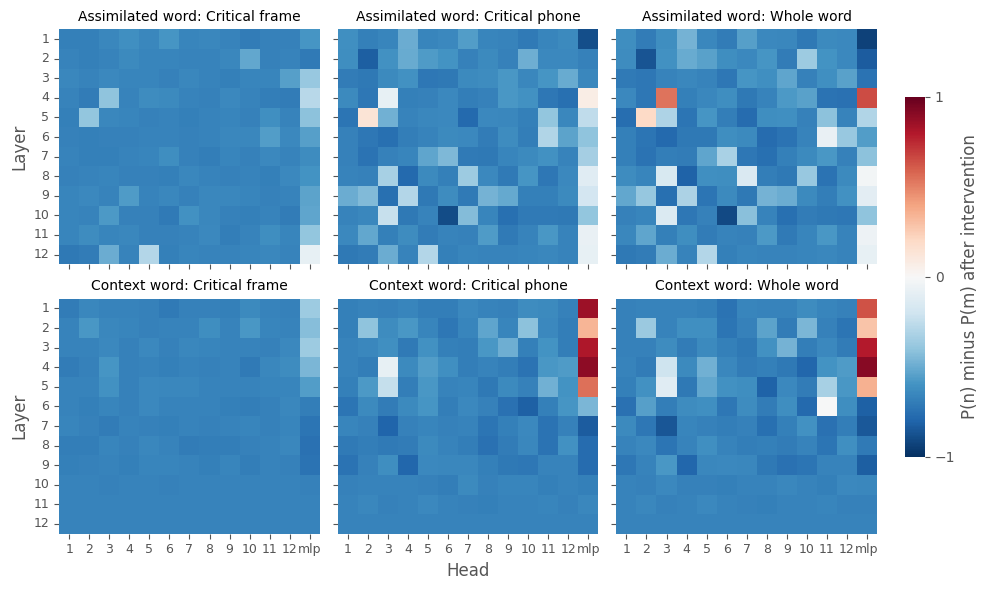

In [23]:
plt.style.use("ggplot")
fig, axn = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))
cbar_ax = fig.add_axes([0.91, 0.23, 0.02, 0.6])

dfs = [pd.DataFrame(heatmap) for heatmap in heatmaps]
print(len(dfs))
titles = [
    "Assimilated word: Critical frame",
    "Assimilated word: Critical phone",
    "Assimilated word: Whole word",
    "Context word: Critical frame",
    "Context word: Critical phone",
    "Context word: Whole word",
]

for i, ax in enumerate(axn.flat):
    g = sns.heatmap(
        dfs[i],
        ax=ax,
        cmap="RdBu_r",
        cbar=i == 0,
        vmin=-1,
        vmax=1,
        cbar_ax=None if i else cbar_ax,
        cbar_kws={"label": r"P(n) minus P(m) after intervention", "ticks": [-1, 0, 1]},
    )
    ax.set_title(titles[i], fontsize=10)
    if i == 4:
        ax.set_xlabel("Head")
    if i == 0 or i == 3:
        ax.set_ylabel("Layer")

    g.set_xticklabels(
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, "mlp"], rotation=0, fontsize=9
    )
    g.set_yticklabels(range(1, 13), rotation=0, fontsize=9)

fig.tight_layout(rect=[0, 0, 0.9, 1])
# plt.savefig(f'interventions_{stimulus}.pdf', dpi=300, bbox_inches='tight')

##Intervening on value vectors

In [28]:
heatmaps = []

In [29]:
v_idx_0 = index_dict[stimulus]["v_context_word"][0]
v_idx_1 = index_dict[stimulus]["v_context_word"][1]
u_idx_0 = index_dict[stimulus]["u_context_word"][0]
u_idx_1 = index_dict[stimulus]["u_context_word"][1]
print(predicted_tokens_list[u_idx_0:u_idx_1])
print(viable_predicted_tokens_list[v_idx_0:v_idx_1])

['L', 'L', 'E', 'E', '<pad>', 'A', '<pad>', '<pad>', 'F', '<pad>', '<pad>', 'L', 'L', '<pad>', '<pad>', 'E', '<pad>', 'T']
['P', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', 'A', 'C', '<pad>', '<pad>', '<pad>', 'K', '<pad>', '<pad>', 'E', '<pad>', 'T', 'T']


###Position: Context word, **critical frame**

In [30]:
def head_hook(module, input, output):
    output[:, module_type, u_idx_0, :] = intervention_output[:, module_type, v_idx_0, :]
    return output


def mlp_hook(module, input, output):
    output[:, u_idx_0, :] = intervention_output_mlp[:, v_idx_0, :]
    return output


intervention_prob_diff = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
}

for layer_index in range(12):
    for module_type in intervention_prob_diff.keys():
        # First, we register my_hook on the target module at layer i and save its handle
        if module_type != "mlp":
            head_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].attention.value_vectors.register_forward_hook(head_hook)
        else:
            mlp_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].feed_forward.output_dense.register_forward_hook(mlp_hook)

        # Next, we define the intervention output, which we'll insert at the target position after the forward pass
        intervention_output = viable_activations[0]["value_vectors"][layer_index][0]
        intervention_output_mlp = viable_activations[0]["feed_forward.output_dense"][
            layer_index
        ][0]

        # Now, we run the forward pass on the unviable input (after the intervention)
        logits_after_intervention = model(unviable_input, output_attentions=True).logits

        # Convert logits to probabilities
        probs_after_intervention = torch.softmax(logits_after_intervention, dim=-1)

        # Remove the hook
        if module_type != "mlp":
            head_hook_handle.remove()

        else:
            mlp_hook_handle.remove()

        # Examine if the intervention changed the transcription
        predicted_ids = torch.argmax(logits_after_intervention, dim=-1)
        transcription = processor.batch_decode(predicted_ids)

        # Calculate logit difference between lexical and acoustic consonant before and after the intervention
        prob_diff_before = (
            probs_before_intervention[0][u_frame_idx][lexical_id].item()
            - probs_before_intervention[0][u_frame_idx][acoustic_id].item()
        )
        prob_diff_after = (
            probs_after_intervention[0][u_frame_idx][lexical_id].item()
            - probs_after_intervention[0][u_frame_idx][acoustic_id].item()
        )

        intervention_prob_diff[module_type].append(prob_diff_after)

heatmaps.append(intervention_prob_diff)

###Position: Context word, **critical phone**

In [31]:
def head_hook(module, input, output):
    output[:, module_type, u_idx_0 - 3 : u_idx_0 + 3 :] = intervention_output[
        :, module_type, v_idx_0 - 3 : v_idx_0 + 3, :
    ]
    return output


def mlp_hook(module, input, output):
    output[:, u_idx_0 - 3 : u_idx_0 + 3, :] = intervention_output_mlp[
        :, v_idx_0 - 3 : v_idx_0 + 3, :
    ]
    return output


intervention_prob_diff = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
}

for layer_index in range(12):
    for module_type in intervention_prob_diff.keys():
        # First, we register my_hook on the target module at layer i and save its handle
        if module_type != "mlp":
            head_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].attention.value_vectors.register_forward_hook(head_hook)
        else:
            mlp_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].feed_forward.output_dense.register_forward_hook(mlp_hook)

        # Next, we define the intervention output, which we'll insert at the target position after the forward pass
        intervention_output = viable_activations[0]["value_vectors"][layer_index][0]
        intervention_output_mlp = viable_activations[0]["feed_forward.output_dense"][
            layer_index
        ][0]

        # Now, we run the forward pass on the unviable input (after the intervention)
        logits_after_intervention = model(unviable_input, output_attentions=True).logits

        # Convert logits to probabilities
        probs_after_intervention = torch.softmax(logits_after_intervention, dim=-1)

        # Remove the hook
        if module_type != "mlp":
            head_hook_handle.remove()

        else:
            mlp_hook_handle.remove()

        # Examine if the intervention changed the transcription
        predicted_ids = torch.argmax(logits_after_intervention, dim=-1)
        transcription = processor.batch_decode(predicted_ids)

        # Calculate logit difference between lexical and acoustic consonant before and after the intervention
        prob_diff_before = (
            probs_before_intervention[0][u_frame_idx][lexical_id].item()
            - probs_before_intervention[0][u_frame_idx][acoustic_id].item()
        )
        prob_diff_after = (
            probs_after_intervention[0][u_frame_idx][lexical_id].item()
            - probs_after_intervention[0][u_frame_idx][acoustic_id].item()
        )

        intervention_prob_diff[module_type].append(prob_diff_after)

heatmaps.append(intervention_prob_diff)

###Position: Context word, **whole word**

In [32]:
def head_hook(module, input, output):
    output[:, module_type, u_idx_0 - 3 : u_idx_1 + 3, :] = intervention_output[
        :, module_type, v_idx_0 - 3 : v_idx_1 + 3, :
    ]
    return output


def mlp_hook(module, input, output):
    output[:, u_idx_0 - 3 : u_idx_1 + 3, :] = intervention_output_mlp[
        :, v_idx_0 - 3 : v_idx_1 + 3, :
    ]
    return output


intervention_prob_diff = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
}

for layer_index in range(12):
    for module_type in intervention_prob_diff.keys():
        # First, we register my_hook on the target module at layer i and save its handle
        if module_type != "mlp":
            head_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].attention.value_vectors.register_forward_hook(head_hook)
        else:
            mlp_hook_handle = model.wav2vec2.encoder.layers[
                layer_index
            ].feed_forward.output_dense.register_forward_hook(mlp_hook)

        # Next, we define the intervention output, which we'll insert at the target position after the forward pass
        intervention_output = viable_activations[0]["value_vectors"][layer_index][0]
        intervention_output_mlp = viable_activations[0]["feed_forward.output_dense"][
            layer_index
        ][0]

        # Now, we run the forward pass on the unviable input (after the intervention)
        logits_after_intervention = model(unviable_input, output_attentions=True).logits

        # Convert logits to probabilities
        probs_after_intervention = torch.softmax(logits_after_intervention, dim=-1)

        # Remove the hook
        if module_type != "mlp":
            head_hook_handle.remove()

        else:
            mlp_hook_handle.remove()

        # Examine if the intervention changed the transcription
        predicted_ids = torch.argmax(logits_after_intervention, dim=-1)
        transcription = processor.batch_decode(predicted_ids)

        # Calculate logit difference between lexical and acoustic consonant before and after the intervention
        prob_diff_before = (
            probs_before_intervention[0][u_frame_idx][lexical_id].item()
            - probs_before_intervention[0][u_frame_idx][acoustic_id].item()
        )
        prob_diff_after = (
            probs_after_intervention[0][u_frame_idx][lexical_id].item()
            - probs_after_intervention[0][u_frame_idx][acoustic_id].item()
        )

        intervention_prob_diff[module_type].append(prob_diff_after)

heatmaps.append(intervention_prob_diff)

###Plot result

3


<ipython-input-33-4755a85aedfa>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


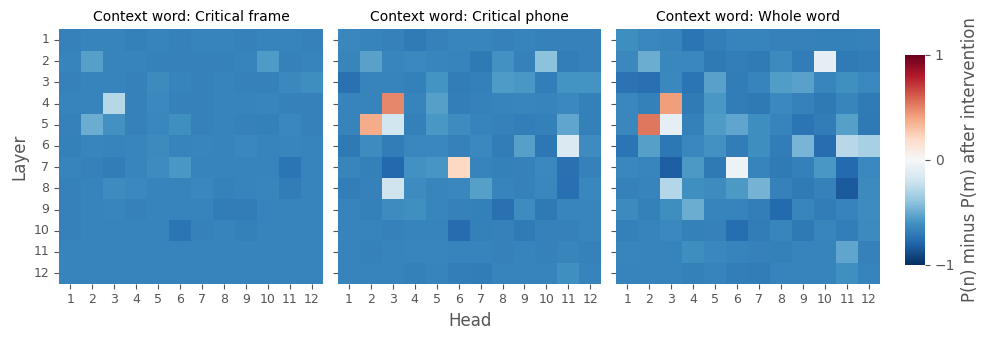

In [33]:
plt.style.use("ggplot")
fig, axn = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3.5))
cbar_ax = fig.add_axes([0.91, 0.23, 0.02, 0.6])

dfs = [pd.DataFrame(heatmap) for heatmap in heatmaps]
print(len(dfs))
titles = [
    "Context word: Critical frame",
    "Context word: Critical phone",
    "Context word: Whole word",
]

for i, ax in enumerate(axn.flat):
    g = sns.heatmap(
        dfs[i],
        ax=ax,
        cmap="RdBu_r",
        cbar=i == 0,
        vmin=-1,
        vmax=1,
        cbar_ax=None if i else cbar_ax,
        cbar_kws={"label": r"P(n) minus P(m) after intervention", "ticks": [-1, 0, 1]},
    )
    ax.set_title(titles[i], fontsize=10)
    if i == 1:
        ax.set_xlabel("Head")
    if i == 0 or i == 3:
        ax.set_ylabel("Layer")

    g.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], rotation=0, fontsize=9)
    g.set_yticklabels(range(1, 13), rotation=0, fontsize=9)

fig.tight_layout(rect=[0, 0, 0.9, 1])
# plt.savefig(f'valvector_interventions_{stimulus}.pdf', dpi=300, bbox_inches='tight')